# Running a calibration with SHyFT


## This notebook is guiding through the simulation process of a catchment. The following steps are described:
1. **Loading required python modules and setting path to SHyFT installation**
2. **Configuration of a SHyFT calibration**
3. **Running a SHyFT calibration**
4. **Inspecting the calibration results**


## 1. Loading required python modules and setting path to SHyFT installation

Shyft requires a number of different modules to be loaded as part of the package. Below, we describe the required steps for loading the modules, and note that some steps are only required for the use of the jupyter notebook.

In [1]:
# Pure python modules and jupyter notebook functionality
# first you should import the third-party python modules which you'll use later on
# the first line enables that figures are shown inline, directly in the notebook
%matplotlib inline
import os
import datetime as dt
from os import path
import sys
from matplotlib import pyplot as plt
import xarray as xr

### The Shyft Environment

This next step is highly specific on how and where you have installed Shyft. If you have followed the guidelines at github, and cloned the three shyft repositories: i) shyft, ii) shyft-data, and iii) shyft-doc, then you may need to tell jupyter notebooks where to find shyft. Uncomment the relevant lines below.

If you have a 'system' shyft, or used `conda install -s sigbjorn shyft` to install shyft, then you probably will want to make sure you have set the SHYFT_DATA directory correctly, as otherwise, Shyft will assume the above structure and fail. __This has to be done _before_ `import shyft`__. In that case, uncomment the relevant lines below.

**note**: it is most likely that you'll need to do one or the other.

In [2]:
from shyft.hydrology import shyftdata_dir

# shyftdata_dir should be set before starting jupyter notebook with shell command:
# $ export SHYFT_DATA = "path_to_shyft_data" 
# this export command can be added to ~/.bashrc profile

In [3]:
# try to auto-configure the path, -will work in all cases where doc and data
# are checked out at same level

shyft_data_path = os.path.abspath("../../../../shyft-data/")
if path.exists(shyft_data_path) and 'SHYFT_DATA' not in os.environ:
    os.environ['SHYFT_DATA']=shyft_data_path
    
# shyft should be available either by it's install in python
# or by PYTHONPATH set by user prior to starting notebook.
# This is equivalent to the two lines below
#  shyft_path=path.abspath('../../../shyft')
#  sys.path.insert(0,shyft_path)

In [4]:
print(shyft_data_path)

/uio/hume/student-u63/jacobqs/Master/code/MST-Himalaya/shyft_workspace_copy/shyft_workspace/shyft-data


In [5]:
# importing the shyft modules needed for running a calibration
from shyft.hydrology.repository.default_state_repository import DefaultStateRepository
from shyft.hydrology.orchestration.configuration.yaml_configs import YAMLCalibConfig, YAMLSimConfig
from shyft.hydrology.orchestration.simulators.config_simulator import ConfigSimulator, ConfigCalibrator

In [6]:
#from ConfigCalibrator import *

## 2. Configuration of a SHyFT calibration

In [7]:
# conduct a configured simulation first.
config_file_path = os.path.join(shyft_data_path, "budhi_gandaki/yaml_config/budhi_gandaki_simulation.yaml")

cfg_sim = YAMLSimConfig(config_file_path, "budhi_gandaki")
simulator = ConfigSimulator(cfg_sim) 
# run the model, and we'll just pull the `api.model` from the `simulator`
simulator.run()
state = simulator.region_model.state

Running simulation...


Now that we have the initial state, we'll run the calibration (this is not a strictly required step, but we use it later)

In [8]:
# # set up configuration using *.yaml configuration files
config_file_path = os.path.join(shyft_data_path,"budhi_gandaki/yaml_config/budhi_gandaki_calibration.yaml") # here is the *.yaml file
cfg_conf = YAMLCalibConfig(config_file_path, "budhi_gandaki")

In [10]:
# initialize an instance of the orchestration's ConfigCalcalibrator class, which has all the functionality needed
# to run a calibration using the above initiated configuration
calib = ConfigCalibrator(cfg_conf)
n_cells = calib.region_model.size()
state_repos = DefaultStateRepository(calib.region_model)  # Notice that this repository needs the real model
#                                                           so that it's able to generate a precise
#                                                           default state-with-id vector for this
#                                                           specific model



Creating TargetSpecificationVector...


In [ ]:
# once the calibrator is set up, all you need to do is running the calibration...
# the calibrated parameters are stored in a model.yaml. 
results = calib.calibrate(cfg_conf.sim_config.time_axis, state_repos.get_state(0), 
                          cfg_conf.optimization_method['name'],
                          cfg_conf.optimization_method['params'])

Calibrating...


In [9]:
target_repo = cfg_conf.get_target_repo()

In [10]:
target_repo

[{'repository': <shyft.hydrology.repository.netcdf.cf_ts_repository.CFTsRepository at 0x7fb4c82d3910>,
  '1D_timeseries': [{'catch_id': [10],
    'uid': 'Arughat',
    'start_datetime': time(946684800),
    'run_time_step': 3600,
    'number_of_steps': 43800,
    'weight': 1.0,
    'obj_func': {'name': 'NSE',
     'scaling_factors': {'s_corr': 1.0, 's_var': 1.0, 's_bias': 1.0}}}]}]

In [11]:
target_repo[0]['1D_timeseries']

[{'catch_id': [10],
  'uid': 'Arughat',
  'start_datetime': time(946684800),
  'run_time_step': 3600,
  'number_of_steps': 43800,
  'weight': 1.0,
  'obj_func': {'name': 'NSE',
   'scaling_factors': {'s_corr': 1.0, 's_var': 1.0, 's_bias': 1.0}}}]

In [14]:
list_of_ts_id = [ts_info['uid'] for ts_info in target_repo[0]['1D_timeseries']]

In [ ]:
# initialize an instance of the orchestration's ConfigCalcalibrator class, which has all the functionality needed
# to run a calibration using the above initiated configuration
calib = ConfigCalibrator(cfg)
n_cells = calib.region_model.size()
state_repos = DefaultStateRepository(calib.region_model)  # Notice that this repository needs the real model
#                                                           so that it's able to generate a precise
#                                                           default state-with-id vector for this
#                                                           specific model


In [45]:
# This file is part of Shyft. Copyright 2015-2018 SiH, JFB, OS, YAS, Statkraft AS
# See file COPYING for more details **/
from builtins import range
from os import path

import numpy as np
from netCDF4 import Dataset

from shyft.time_series import (TimeAxisFixedDeltaT,TsFactory,DoubleVector)
from shyft.hydrology import shyftdata_dir
from shyft.hydrology.repository.netcdf.time_conversion import convert_netcdf_time
from shyft.hydrology.repository import interfaces


class CFTsRepositoryError(Exception):
    pass


class CFTsRepository(interfaces.TsRepository):
    """
    Repository for geo located timeseries stored in netCDF files.

    """

    def __init__(self, file, var_type):
        """
        Construct the netCDF4 dataset reader for data from Arome NWP model,
        and initialize data retrieval.
        """
        # directory = params['data_dir']
        filename = path.expandvars(file)
        self.var_name = var_type

        # if not path.isdir(directory):
        #    raise CFDataRepositoryError("No such directory '{}'".format(directory))
        if not path.isabs(filename):
            # Relative paths will be prepended the data_dir
            filename = path.join(shyftdata_dir, filename)
        if not path.isfile(filename):
            raise CFTsRepositoryError("No such file '{}'".format(filename))

        self._filename = filename  # path.join(directory, filename)

    def read(self, list_of_ts_id, period):
        if not period.valid():
            raise CFTsRepositoryError("period should be valid()  of type UtcPeriod")

        filename = self._filename

        if not path.isfile(filename):
            raise CFTsRepositoryError("File '{}' not found".format(filename))
        dataset = xr.open_mfdataset(filename, decode_times = False)
        
        return self._get_data_from_dataset(dataset, period, list_of_ts_id)
#         with Dataset(filename) as dataset:
#             return self._get_data_from_dataset(dataset, period, list_of_ts_id)

    def _convert_to_timeseries(self, data, t, ts_id):
        ta = TimeAxisFixedDeltaT(int(t[0]), int(t[1]) - int(t[0]), len(t))
        tsc = TsFactory().create_point_ts

        def construct(d):
            return tsc(ta.size(), ta.start, ta.delta_t,
                       DoubleVector.from_numpy(d))

        ts = [construct(data[:, j]) for j in range(data.shape[-1])]
        return {k: v for k, v in zip(ts_id, ts)}

    def _get_data_from_dataset(self, dataset, utc_period, ts_id_to_extract):

        ts_id_key = 'series_name'
        ts_id_in_file = np.array(list(dataset['series_name'].values))
        time = dataset.time
        data = dataset[self.var_name]
        dim_nb_series = []
        for i in dataset.dims:
            if i != 'time':
                dim_nb_series.append(i)
        if (len(data.values) or len(time.values)) == 0:
            print("Something is wrong with the dataset."
                                      " hydroclim variable or time not found.")
        time = convert_netcdf_time(time.units, time)
        idx_min = np.searchsorted(time, utc_period.start, side='left')
        if time[idx_min] > utc_period.start and idx_min > 0:  # important ! ensure data *cover* the requested period, Shyft ts do take care of resolution etc.
            idx_min -= 1  # extend range downward so we cover the entire requested period
        idx_max = np.searchsorted(time, utc_period.end, side='right')
        if time[idx_max] < utc_period.end and idx_max + 1 < len(time):
            idx_max += 1  # extend range upward so that we cover the requested period

        issubset = True if idx_max < len(time) - 1 else False
        time_slice = slice(idx_min, idx_max)
        mask = np.array([idx in ts_id_to_extract for idx in ts_id_in_file])
        dims = data.dims
        series_indxs = []
        for i, name in enumerate(dataset.series_name.values):
            if name in ts_id_to_extract:
                series_indxs.append(i)
        extracted_data = data.sel(series = series_indxs, time = time_slice)
        #     if isinstance(extracted_data, np.ma.core.MaskedArray):
    #         extracted_data = extracted_data.filled(np.nan)
        return self._convert_to_timeseries(extracted_data, time.sel(time = time_slice), ts_id_in_file[mask])
        


In [237]:
shyft_data_path

'/uio/hume/student-u63/jacobqs/Master/code/MST-Himalaya/shyft_workspace_copy/shyft_workspace/shyft-data'

In [61]:
import xarray as xr
dc = xr.open_mfdataset(shyft_data_path + '/netcdf/orchestration-testdata/discharge.nc', decode_times = False)

In [32]:
file = 'netcdf/orchestration-testdata/discharge.nc'
var_type = 'discharge'
filename = path.join(shyftdata_dir, file)

In [46]:
cfts_repo = CFTsRepository(file, var_type)

In [47]:
list_of_ts_id = [ts_info['uid'] for ts_info in target_repo[0]['1D_timeseries']]
period = cfg_sim.time_axis.total_period()

In [48]:
ts = cfts_repo.read(list_of_ts_id, period)

In [64]:
import netCDF4
from netCDF4 import Dataset

In [240]:
cfts_repo.read(list_of_ts_id, period)

slice(0, 3651, None)


RuntimeError: point_ts: time-axis size is different from value-size

In [66]:
ds = Dataset(filename, 'r')

In [185]:
def get_data_from_dataset(dataset, utc_period, ts_id_to_extract, var_name):
    ts_id_key = [k for (k, v) in dataset.variables.items() if getattr(v, 'cf_role', None) == 'timeseries_id'][0]
    ts_id_in_file = dataset.variables[ts_id_key][:]
    time = dataset.variables.get("time", None)
    data = dataset[var_type]
    dim_nb_series = [dim.name for dim in dataset.dimensions.values() if dim.name != 'time'][0]
    if not all([data, time]):
        raise CFTsRepositoryError("Something is wrong with the dataset."
                                  " hydroclim variable or time not found.")
    time = convert_netcdf_time(time.units, time)
    idx_min = np.searchsorted(time, utc_period.start, side='left')
    if time[idx_min] > utc_period.start and idx_min > 0:  # important ! ensure data *cover* the requested period, Shyft ts do take care of resolution etc.
        idx_min -= 1  # extend range downward so we cover the entire requested period

    idx_max = np.searchsorted(time, utc_period.end, side='right')

    if time[idx_max] < utc_period.end and idx_max + 1 < len(time):
        idx_max += 1  # extend range upward so that we cover the requested period

    issubset = True if idx_max < len(time) - 1 else False
    time_slice = slice(idx_min, idx_max)

    mask = np.array([idx in ts_id_to_extract for idx in ts_id_in_file])
    dims = data.dimensions
    data_slice = len(data.dimensions)*[slice(None)]
    data_slice[dims.index(dim_nb_series)] = mask
    data_slice[dims.index("time")] = time_slice
    extracted_data = data[data_slice]
    return extracted_data
#     if isinstance(extracted_data, np.ma.core.MaskedArray):
#         extracted_data = extracted_data.filled(np.nan)

#     return self._convert_to_timeseries(extracted_data, time[time_slice], ts_id_in_file[mask])

In [78]:
np.searchsorted(time, period.start, side='left')

5654

In [186]:
d = get_data_from_dataset(ds, period, list_of_ts_id, var_type)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [71]:
dc

<xarray.Dataset>
Dimensions:       (series: 1, time: 5654)
Coordinates:
  * time          (time) int64 0 1 2 3 4 5 6 ... 5838 5839 5840 5841 5842 5843
    x             (series) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    y             (series) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    z             (series) float64 dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: series
Data variables:
    series_name   (series) object dask.array<chunksize=(1,), meta=np.ndarray>
    catchment_id  (series) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    crs           int32 ...
    discharge     (time, series) float64 dask.array<chunksize=(5654, 1), meta=np.ndarray>

In [17]:
dc.dims.values()

ValuesView(Frozen({'series': 1, 'time': 5654}))

In [25]:
dims_name = []
for i in dc.dims:
    if i != 'time':
        dims_name.append(i)

In [72]:
data = dc['discharge']

In [73]:
time = dc['time']

In [59]:
time.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2015-12-31

In [38]:
import numpy as np
np.sum(np.isnan(time.values))

0

In [74]:
from shyft.hydrology.repository.netcdf.time_conversion import convert_netcdf_time
convert_netcdf_time(time.units, time)

<xarray.DataArray 'time' (time: 5654)>
array([ 946684800,  946771200,  946857600, ..., 1451347200, 1451433600,
       1451520000])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 ... 5837 5838 5839 5840 5841 5842 5843
Attributes:
    units:     days since 2000-01-01 00:00:00
    calendar:  proleptic_gregorian

In [41]:
if len(data.values) == 0:
    print('empty')

In [105]:
dc.dims

Frozen({'series': 1, 'time': 5654})

In [216]:
def get_data_from_dataset(dataset, utc_period, ts_id_to_extract, var_name):
    ts_id_key = 'series_name'
    ts_id_in_file = np.array(list(dataset['series_name'].values))
    time = dataset.time
    data = dataset[var_type]
    dim_nb_series = []
    for i in dataset.dims:
        if i != 'time':
            dim_nb_series.append(i)
    if (len(data.values) or len(time.values)) == 0:
        print("Something is wrong with the dataset."
                                  " hydroclim variable or time not found.")
    time = convert_netcdf_time(time.units, time)
    idx_min = np.searchsorted(time, utc_period.start, side='left')
    if time[idx_min] > utc_period.start and idx_min > 0:  # important ! ensure data *cover* the requested period, Shyft ts do take care of resolution etc.
        idx_min -= 1  # extend range downward so we cover the entire requested period
    idx_max = np.searchsorted(time, utc_period.end, side='right')
    if time[idx_max] < utc_period.end and idx_max + 1 < len(time):
        idx_max += 1  # extend range upward so that we cover the requested period

    issubset = True if idx_max < len(time) - 1 else False
    time_slice = slice(idx_min, idx_max)
    print(time_slice)
    mask = np.array([idx in ts_id_to_extract for idx in ts_id_in_file])
    dims = data.dims
    series_indxs = []
    for i, name in enumerate(dataset.series_name.values):
        if name in ts_id_to_extract:
            series_indxs.append(i)
    extracted_data = data.sel(series = series_indxs)
    #     if isinstance(extracted_data, np.ma.core.MaskedArray):
#         extracted_data = extracted_data.filled(np.nan)
    return self._convert_to_timeseries(extracted_data, time.sel(time = time_slice), ts_id_in_file[mask])

In [199]:
time = convert_netcdf_time(dc.time.units, dc.time)

In [203]:
time_slice

slice(0, 3651, None)

In [215]:
np.array(ts_id_in_file)[mask]

array(['Arughat'], dtype='<U7')

In [204]:
time.sel(time = time_slice)

<xarray.DataArray 'time' (time: 3652)>
array([ 946684800,  946771200,  946857600, ..., 1261958400, 1262044800,
       1262131200])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 ... 3645 3646 3647 3648 3649 3650 3651
Attributes:
    units:     days since 2000-01-01 00:00:00
    calendar:  proleptic_gregorian

In [217]:
d = get_data_from_dataset(dc, period, list_of_ts_id, var_type)

slice(0, 3651, None)


NameError: name 'self' is not defined

In [194]:
np.sum(np.isnan(d.values))

0

In [180]:
dc.series_name.values

array(['Arughat'], dtype=object)

In [162]:
list_of_ts_id

['Arughat']

In [161]:
for idx in ts_id_in_file:
    print(idx)

Arughat


In [151]:
dim_nb_series = []
for i in dc.dims:
    if i != 'time':
        dim_nb_series.append(i)

In [152]:
dim_nb_series

['series']

In [154]:
time_slice = slice(0, 3651, None)

In [143]:
ts_id_in_file = list(dataset['series_name'].values)
mask = np.array([idx in list_of_ts_id for idx in ts_id_in_file])

In [144]:
mask

array([ True])

In [147]:
data_slice = len(dc.dims)*[slice(None)]

In [155]:
data_slice[0] = mask
data_slice[1] = time_slice

In [156]:
data_slice

[array([ True]), slice(0, 3651, None)]

In [134]:
dim_nb_series[0]

'series'

In [141]:
slice(None)

slice(None, None, None)

In [140]:
dims = dc.dims
len(dims)

2

In [135]:
dims[dim_nb_series]

TypeError: unhashable type: 'list'

In [125]:
data_slice = len(dc.dims)*[slice(None)]

In [126]:
data_slice

[slice(None, None, None), slice(None, None, None)]

In [118]:
dc.dims

Frozen({'series': 1, 'time': 5654})

In [184]:
dataset = xr.open_mfdataset(filename, decode_times = False)

get_data_from_dataset(dataset, period, list_of_ts_id, 'discharge')

<xarray.DataArray 'discharge' (time: 5654, series: 1)>
dask.array<open_dataset-a760300a2e61f1f83ad046c9dbfcb742discharge, shape=(5654, 1), dtype=float64, chunksize=(5654, 1), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 ... 5837 5838 5839 5840 5841 5842 5843
    x        (series) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    y        (series) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    z        (series) float64 dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: series
Attributes:
    units:         m3 s-1
    grid_mapping:  crs

In [107]:
ds.dimensions

{'series': <class 'netCDF4._netCDF4.Dimension'>: name = 'series', size = 1,
 'time': <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 5654}

In [29]:
def rd(list_of_ts_id, period):
    with Dataset(filename) as dataset:
        return get_data_from_dataset(dataset = dataset, utc_period = period, ts_id_to_extract = list_of_ts_id, var_name = var_type)

In [30]:
rd(list_of_ts_id, period)

[slice(0, 3651, None), array([ True])]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [24]:
data

RuntimeError: NetCDF: Not a valid ID

In [31]:
ds = Dataset(filename, mode = 'r')

In [32]:
ds.variables.get('discharge', None)

<class 'netCDF4._netCDF4.Variable'>
float64 discharge(time, series)
    _FillValue: nan
    units: m3 s-1
    grid_mapping: crs
    coordinates: x y z
unlimited dimensions: 
current shape = (5654, 1)
filling on

In [35]:
ds['discharge'][slice(0, 3651, None), np.array([ True])]

masked_array(
  data=[[39.1],
        [39.1],
        [38.5],
        ...,
        [34.5],
        [34. ],
        [33.8]],
  mask=False,
  fill_value=1e+20)

In [ ]:
with Dataset(filename) as dataset:
---> 53     return self._get_data_from_dataset(dataset, period, list_of_ts_id)

## 3. Running a SHyFT calibration

In [12]:
# once the calibrator is set up, all you need to do is running the calibration...
# the calibrated parameters are stored in a model.yaml. 
results = calib.calibrate(cfg.sim_config.time_axis, state_repos.get_state(0), 
                          cfg.optimization_method['name'],
                          cfg.optimization_method['params'])

Calibrating...
Storing calibrated params in: /opt/site/shyft/projects/shyft-data/neanidelv/yaml_config/calibrated_model.yaml


## 4. Inspecting the calibration results
First the Nash-Suttcliffe-efficiency of the calibrated simulation is computed to see the quality of the calibration.
Then the calibrated model parameters are accessed and printed out.

In [14]:
# Get NSE of calibrated run:
result_params = []
for i in range(results.size()):
    result_params.append(results.get(i))
print("Final NSE =", 1-calib.optimizer.calculate_goal_function(result_params))

Final NSE = 0.8526419120373286


In [15]:
# Check out the calibrated parameters.

diff = 1.0E-3
print("{0:30s} {1:10s}".format("PARAM-NAME", "CALIB-VALUE"))

for i in range(results.size()):
    print("{0:30s} {1:10f}".format(results.get_name(i), results.get(i)))

PARAM-NAME                     CALIB-VALUE
kirchner.c1                     -2.847678
kirchner.c2                      0.654901
kirchner.c3                     -0.104582
ae.ae_scale_factor               1.500000
gs.tx                            0.040385
gs.wind_scale                    1.750174
gs.max_water                     0.100000
gs.wind_const                    1.000000
gs.fast_albedo_decay_rate       10.720685
gs.slow_albedo_decay_rate       37.940544
gs.surface_magnitude            30.000000
gs.max_albedo                    0.900000
gs.min_albedo                    0.600000
gs.snowfall_reset_depth          5.000000
gs.snow_cv                       0.400000
gs.glacier_albedo                0.400000
p_corr.scale_factor              1.000000
gs.snow_cv_forest_factor         0.000000
gs.snow_cv_altitude_factor       0.000000
pt.albedo                        0.200000
pt.alpha                         1.260000
gs.initial_bare_ground_fraction   0.040000
gs.winter_end_day_of_year      1

### Plotting simulated and observed discharge
We are now plotting the simulated and observed discharge timeseries over the course of the melt period.


In [22]:
# get the target vector and discharge statistics from the configured calibrator
target_obs = calib.tv[0]
disch_sim = calib.region_model.statistics.discharge(target_obs.catchment_indexes)
disch_obs = target_obs.ts.values


ts_timestamps_sim = [datetime.datetime.utcfromtimestamp(p) for p in disch_sim.time_axis.time_points]
ts_timestamps_sim = ts_timestamps_sim[:-1]

ts_timestamps_obs = [dt.datetime.utcfromtimestamp(p) for p in target_obs.ts.time_axis.time_points]
ts_timestamps_obs = ts_timestamps_obs[:-1]

Text(0, 0.5, 'discharge [m3 s-1]')

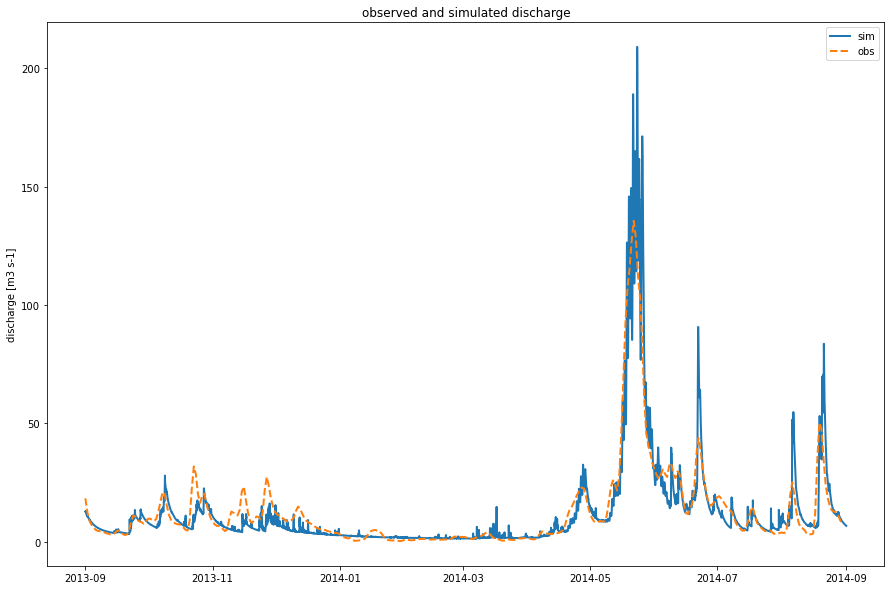

In [23]:
# plot up the results
fig, ax = plt.subplots(1, figsize=(15,10))
ax.plot(ts_timestamps_sim, disch_sim.values, lw=2, label = "sim")
ax.plot(ts_timestamps_obs, disch_obs, lw=2, ls='--', label = "obs")
ax.set_title("observed and simulated discharge")
ax.legend()
ax.set_ylabel("discharge [m3 s-1]")

## 5. Changing parameters on-the-fly
Instead of changing model parameters in the yaml-configs, reload the configuration and re-run the model, we can also just change the parameters "on-the-fly", and rerun the model. This makes it easy to investigate the influence of certain model parameters on the simulation results.

### 5a. Snow or rain? The parameter gs.tx sets the threshold temperature at which precipitation is treated as snow fall.

In the following we'll investigate the impact of manually manipulating this parameter.

In [24]:
parameters = calib.region_model.get_region_parameter() # fetching parameters from the simulator object
print(u"Calibrated rain/snow threshold temp: {} C".format(parameters.gs.tx)) # print current value of hs.tx

Calibrated rain/snow threshold temp: 0.040384948079944305 C


In the following, we first set the hs.tx parameter to a higher, and then to a lower value compared to the value the calibration results suggest. We re-run the simulation, respicetively, and plot the results.

Running simulation...
Running simulation...


Text(0, 0.5, 'discharge [m3 s-1]')

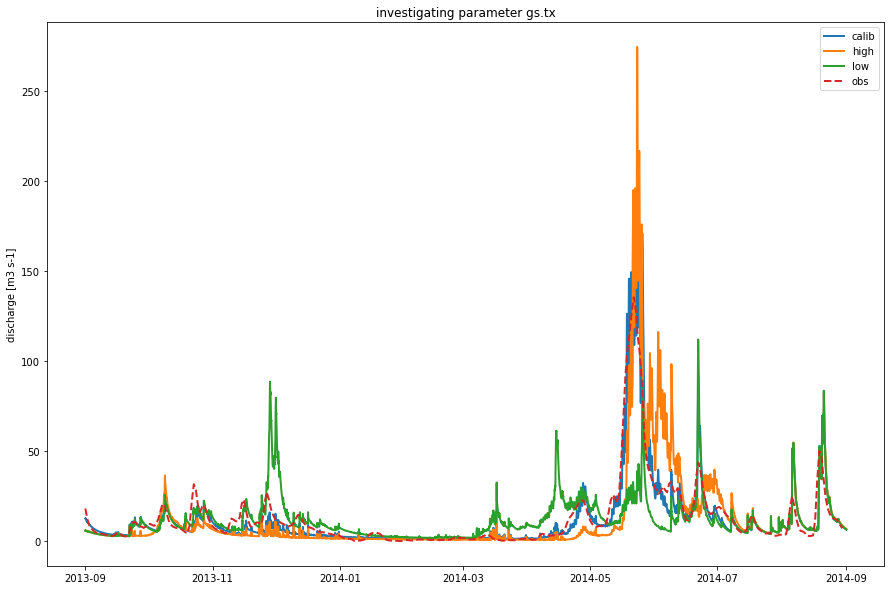

In [25]:
calib.optimizer.calculate_goal_function(result_params) # reset the parameters to the values of the calibration
parameters.gs.tx = 4.0 # setting a higher value for tx
s_init = state.extract_state([])
# type(state)
# s0=state_repos.get_state(0)
# s0.state_vector
# state.apply_state(s0, [])
calib.run(state=s_init) # rerun the model, with new parameter
disch_sim_p_high = calib.region_model.statistics.discharge(target_obs.catchment_indexes) # fetch discharge ts
parameters.gs.tx = -4.0 # setting a higher value for tx

calib.run(state=s_init) # rerun the model, with new parameter

disch_sim_p_low = calib.region_model.statistics.discharge(target_obs.catchment_indexes) # fetch discharge ts
fig, ax = plt.subplots(1, figsize=(15,10))
ax.plot(ts_timestamps_sim, disch_sim.values, lw=2, label = "calib")
ax.plot(ts_timestamps_sim, disch_sim_p_high.values, lw=2, label = "high")
ax.plot(ts_timestamps_sim, disch_sim_p_low.values, lw=2, label = "low")
ax.plot(ts_timestamps_obs, disch_obs, lw=2, ls='--', label = "obs")
ax.set_title("investigating parameter gs.tx")
ax.legend()
ax.set_ylabel("discharge [m3 s-1]")

Running simulation...
Running simulation...


Text(0, 0.5, 'discharge [m3 s-1]')

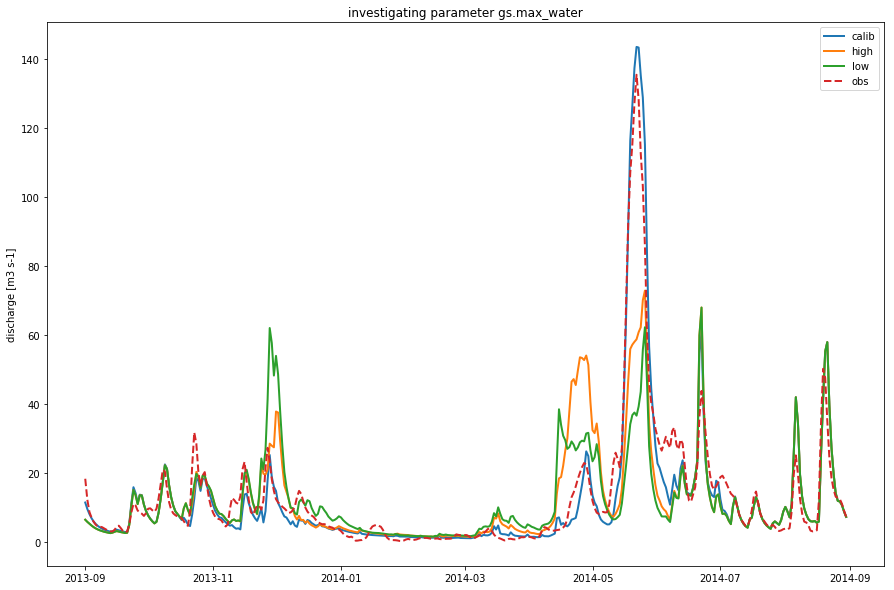

In [14]:
s_init = state.extract_state([])

# reset the max water parameter
parameters.gs.max_water = 1.0 # setting a higher value for tx
calib.run(state=s_init) # rerun the model, with new parameter
disch_sim_p_high = calib.region_model.statistics.discharge(target_obs.catchment_indexes) # fetch discharge ts

parameters.gs.max_water = .001 # setting a higher value for tx
calib.run(state=s_init) # rerun the model, with new parameter
disch_sim_p_low = calib.region_model.statistics.discharge(target_obs.catchment_indexes) # fetch discharge ts

# plot the results
fig, ax = plt.subplots(1, figsize=(15,10))
ax.plot(ts_timestamps, disch_sim.values, lw=2, label = "calib")
ax.plot(ts_timestamps, disch_sim_p_high.values, lw=2, label = "high")
ax.plot(ts_timestamps, disch_sim_p_low.values, lw=2, label = "low")
ax.plot(ts_timestamps, disch_obs, lw=2, ls='--', label = "obs")
ax.set_title("investigating parameter gs.max_water")
ax.legend()
ax.set_ylabel("discharge [m3 s-1]")